In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import time 
from scipy.stats import norm 


In [ ]:
def histograma_(df, var, color, title, x_axis, y_axis, size):
    plt.figure(figsize=size)
    sns.histplot(data=df[var],kde=True,color=color,bins=50)
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

# 1.- Lectura y descripcion de los datos historicos

Se descargan los precios de cierre de las acciones de Apple, Amazon, Tesla, Meta y Google desde el año 2013 hasta la actualidad, para asi poder obtener los log-rendimientos historicos de las acciones.


Los log-rendimientos se obtienen mediante una simple formula:

$ln(\frac{P_t}{P_{t-1}})$

Con $P$ el precio del activo a tiempo $t$, que coloquialmente seria el precio de hoy entre el precio de ayer.

In [ ]:
#Acciones en el portafolio, en este caso seran 5
acciones = ['AAPL',"AMZN","TSLA","META","GOOG"]
colors = ['#DAF7A6',"#C70039"]
#Fecha en que comienza la extraccion de los datos
start = '2013-04-21'
end = time.strftime("%Y-%m-%d", time.localtime())
df_precios = yf.download(acciones, start = start, end = end)['Close'].reset_index()
df_percios = df_precios.rename({"Date": "Fechas"}, axis=1)
df_percios

[*********************100%***********************]  5 of 5 completed


,Fechas,AAPL,AMZN,GOOG,META,TSLA
0,2013-04-22,14.238214,13.177500,19.928055,25.969999,3.346000
1,2013-04-23,14.504643,13.445000,20.122078,25.980000,3.400667
2,2013-04-24,14.480714,13.439000,20.260309,26.110001,3.362000
3,2013-04-25,14.585000,13.735000,20.151964,26.139999,3.466667
4,2013-04-26,14.900000,12.740500,19.960682,26.850000,3.413333
...,...,...,...,...,...,...
2534,2023-05-15,172.070007,111.199997,116.959999,238.860001,166.350006
2535,2023-05-16,172.070007,113.400002,120.089996,238.820007,166.520004
2536,2023-05-17,172.690002,115.500000,121.480003,242.490005,173.860001
2537,2023-05-18,175.050003,118.150002,123.519997,246.850006,176.889999


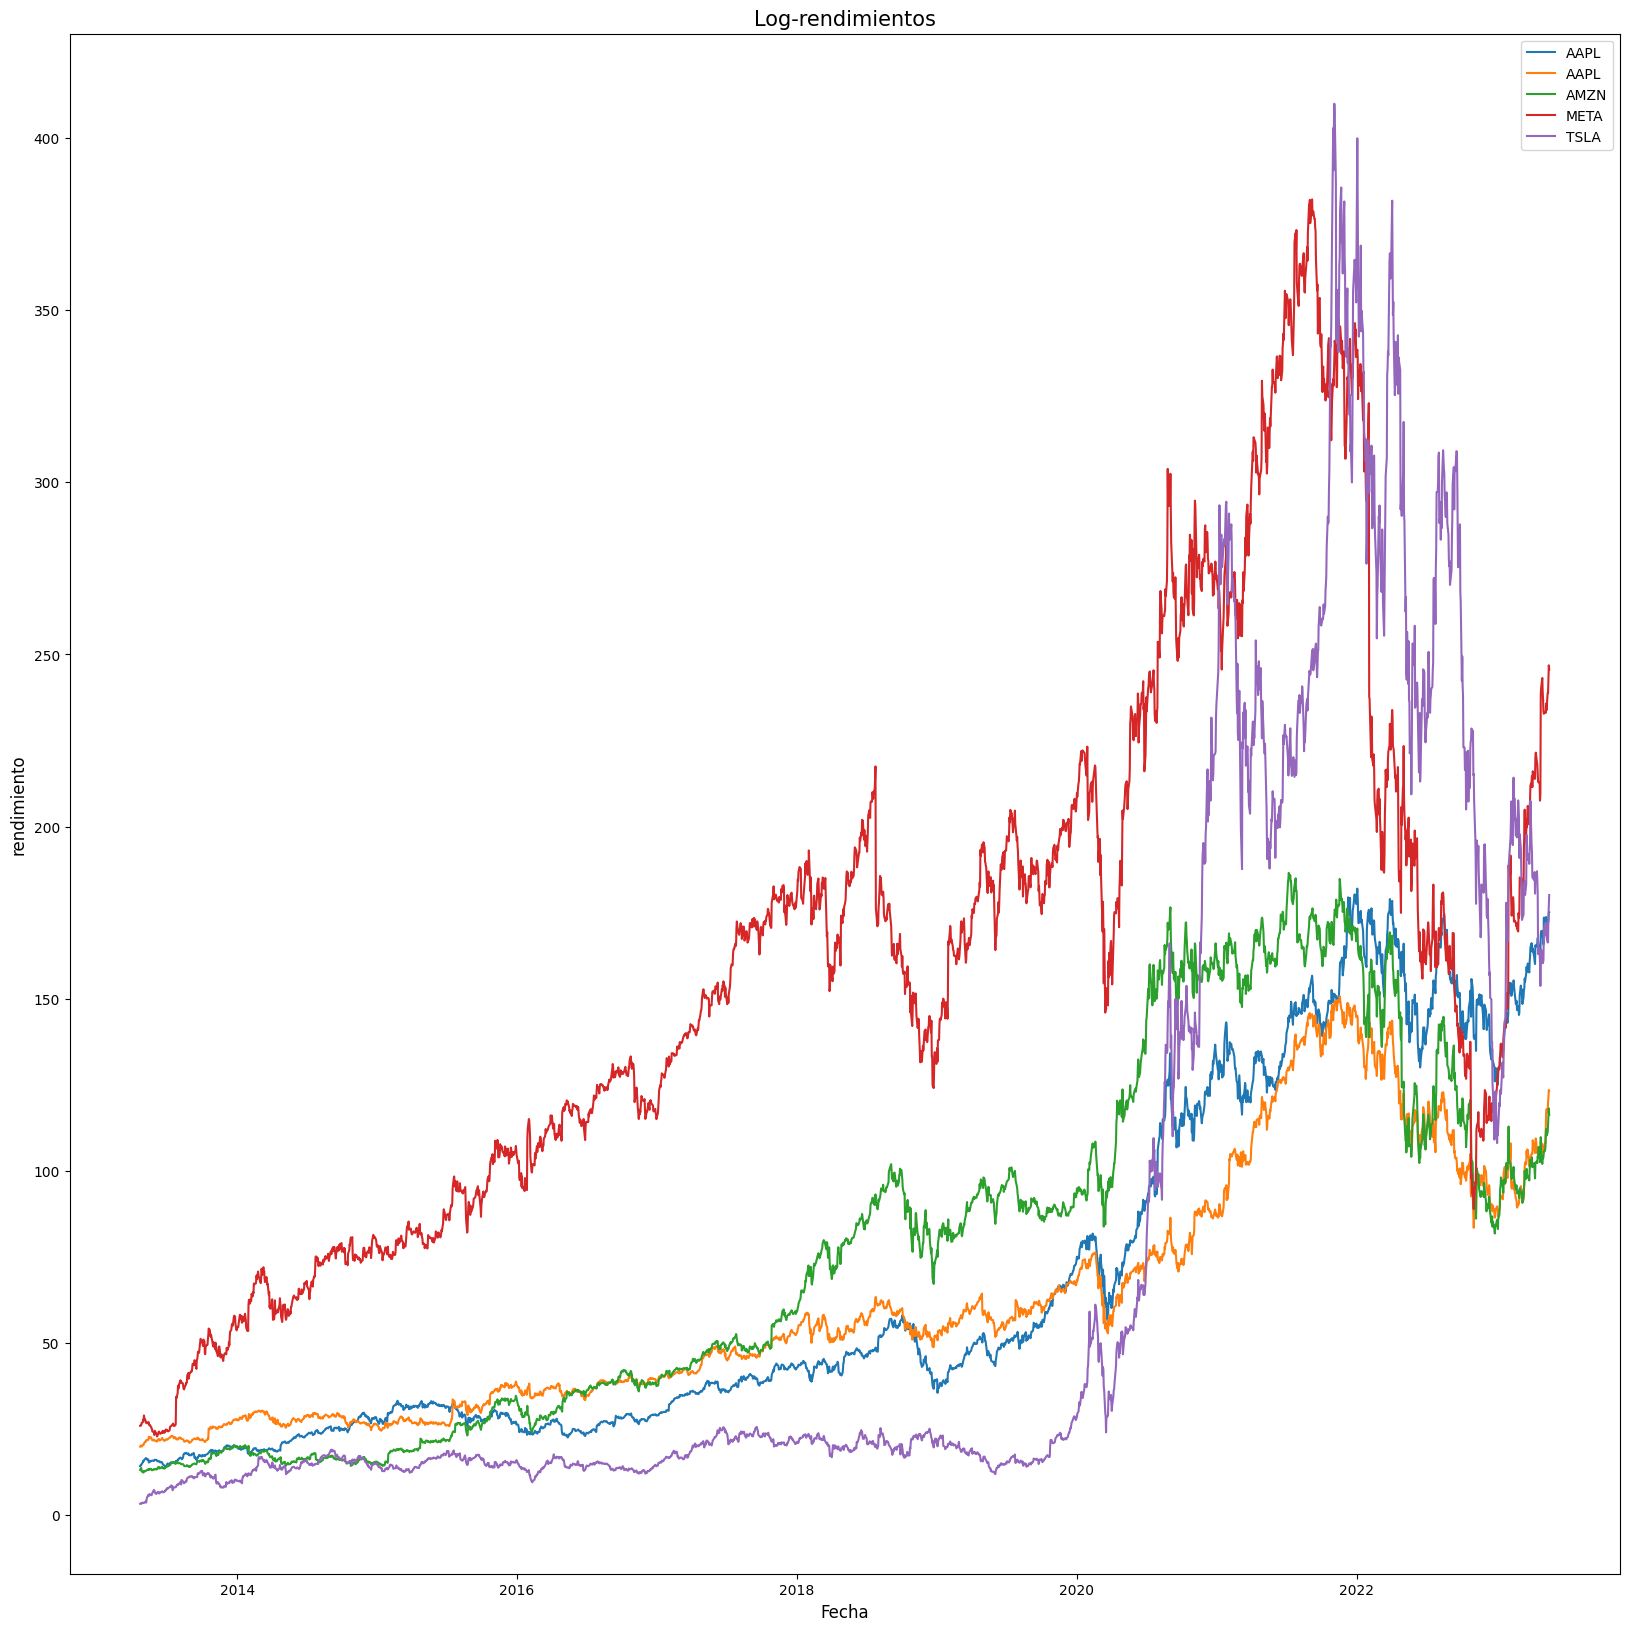

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(df_percios["Fechas"],df_percios["AAPL"],label="AAPL")
plt.plot(df_percios["Fechas"],df_percios["GOOG"],label="AAPL")
plt.plot(df_percios["Fechas"],df_percios["AMZN"],label="AMZN")
plt.plot(df_percios["Fechas"],df_percios["META"],label="META")
plt.plot(df_percios["Fechas"],df_percios["TSLA"],label="TSLA")
plt.title('Log-rendimientos',fontsize=15)
plt.xlabel('Fecha',fontsize=12)
plt.ylabel('rendimiento',fontsize=12)
plt.legend()
plt.show()

## Obtencion de los log-rendimientos de los activos


In [ ]:
df_percios["Rend_AAPL"] = np.log(df_percios["AAPL"]/df_percios["AAPL"].shift(1))
df_percios["Rend_GOOG"] = np.log(df_percios["GOOG"]/df_percios["GOOG"].shift(1))
df_percios["Rend_AMZN"] = np.log(df_percios["AMZN"]/df_percios["AMZN"].shift(1))
df_percios["Rend_META"] = np.log(df_percios["META"]/df_percios["META"].shift(1))
df_percios["Rend_TSLA"] = np.log(df_percios["TSLA"]/df_percios["TSLA"].shift(1))
df_percios

,Fechas,AAPL,AMZN,GOOG,META,TSLA,Rend_AAPL,Rend_GOOG,Rend_AMZN,Rend_META,Rend_TSLA
0,2013-04-22,14.238214,13.177500,19.928055,25.969999,3.346000,NaN,NaN,NaN,NaN,NaN
1,2013-04-23,14.504643,13.445000,20.122078,25.980000,3.400667,0.018539,0.009689,0.020096,0.000385,0.016206
2,2013-04-24,14.480714,13.439000,20.260309,26.110001,3.362000,-0.001651,0.006846,-0.000446,0.004991,-0.011436
3,2013-04-25,14.585000,13.735000,20.151964,26.139999,3.466667,0.007176,-0.005362,0.021786,0.001148,0.030658
4,2013-04-26,14.900000,12.740500,19.960682,26.850000,3.413333,0.021368,-0.009537,-0.075161,0.026799,-0.015504
...,...,...,...,...,...,...,...,...,...,...,...
2534,2023-05-15,172.070007,111.199997,116.959999,238.860001,166.350006,-0.002902,-0.008174,0.008489,0.021369,-0.009751
2535,2023-05-16,172.070007,113.400002,120.089996,238.820007,166.520004,0.000000,0.026409,0.019591,-0.000167,0.001021
2536,2023-05-17,172.690002,115.500000,121.480003,242.490005,173.860001,0.003597,0.011508,0.018349,0.015250,0.043135
2537,2023-05-18,175.050003,118.150002,123.519997,246.850006,176.889999,0.013574,0.016653,0.022684,0.017820,0.017278


In [ ]:
#Borramos lo NaN y restablecemos los indices
df_percios.dropna(inplace=True)
df_percios.reset_index(drop=True,inplace=True)
df_percios

,Fechas,AAPL,AMZN,GOOG,META,TSLA,Rend_AAPL,Rend_GOOG,Rend_AMZN,Rend_META,Rend_TSLA
0,2013-04-23,14.504643,13.445000,20.122078,25.980000,3.400667,0.018539,0.009689,0.020096,0.000385,0.016206
1,2013-04-24,14.480714,13.439000,20.260309,26.110001,3.362000,-0.001651,0.006846,-0.000446,0.004991,-0.011436
2,2013-04-25,14.585000,13.735000,20.151964,26.139999,3.466667,0.007176,-0.005362,0.021786,0.001148,0.030658
3,2013-04-26,14.900000,12.740500,19.960682,26.850000,3.413333,0.021368,-0.009537,-0.075161,0.026799,-0.015504
4,2013-04-29,15.361429,12.487000,20.400036,26.980000,3.662667,0.030499,0.021772,-0.020098,0.004830,0.070502
...,...,...,...,...,...,...,...,...,...,...,...
2533,2023-05-15,172.070007,111.199997,116.959999,238.860001,166.350006,-0.002902,-0.008174,0.008489,0.021369,-0.009751
2534,2023-05-16,172.070007,113.400002,120.089996,238.820007,166.520004,0.000000,0.026409,0.019591,-0.000167,0.001021
2535,2023-05-17,172.690002,115.500000,121.480003,242.490005,173.860001,0.003597,0.011508,0.018349,0.015250,0.043135
2536,2023-05-18,175.050003,118.150002,123.519997,246.850006,176.889999,0.013574,0.016653,0.022684,0.017820,0.017278


Se obtiene la media y desviacion estandar de los activos, que serviran despues para el caluclo de los precios futuros.

In [ ]:
media_AAPL = df_percios["Rend_AAPL"].mean()
desviacion_AAPL = df_percios["Rend_AAPL"].std()

media_GOOG = df_percios["Rend_GOOG"].mean()
desviacion_GOOG = df_percios["Rend_GOOG"].std()

media_AMZN = df_percios["Rend_AMZN"].mean()
desviacion_AMZN = df_percios["Rend_AMZN"].std()

media_META = df_percios["Rend_META"].mean()
desviacion_META = df_percios["Rend_META"].std()

media_TSLA = df_percios["Rend_TSLA"].mean()
desviacion_TSLA = df_percios["Rend_TSLA"].std()

# 2.- Composicion del portafolio 

In [ ]:
df_portafolio =  pd.DataFrame()
#Numero de acciones por empresa
acc_AAPL = 50
acc_GOOG = 100
acc_AMZN= 120
acc_META = 80
acc_TSLA = 70
df_portafolio["Fechas"] = df_percios["Fechas"]
df_portafolio["AAPL"] = acc_AAPL*df_percios["AAPL"]
df_portafolio["GOOG"] = acc_GOOG*df_percios["GOOG"]
df_portafolio["AMZN"] = acc_AMZN*df_percios["AMZN"]
df_portafolio["META"] = acc_META*df_percios["META"]
df_portafolio["TSLA"] = acc_META*df_percios["TSLA"]
df_portafolio

,Fechas,AAPL,GOOG,AMZN,META,TSLA
0,2013-04-23,725.232172,2012.207794,1613.399963,2078.399963,272.053356
1,2013-04-24,724.035692,2026.030922,1612.680016,2088.800049,268.959999
2,2013-04-25,729.250002,2015.196419,1648.199959,2091.199951,277.333355
3,2013-04-26,744.999981,1996.068192,1528.860054,2148.000031,273.066635
4,2013-04-29,768.071461,2040.003586,1498.440056,2158.399963,293.013363
...,...,...,...,...,...,...
2533,2023-05-15,8603.500366,11695.999908,13343.999634,19108.800049,13308.000488
2534,2023-05-16,8603.500366,12008.999634,13608.000183,19105.600586,13321.600342
2535,2023-05-17,8634.500122,12148.000336,13860.000000,19399.200439,13908.800049
2536,2023-05-18,8752.500153,12351.999664,14178.000183,19748.000488,14151.199951


El precio total del portafolio en cada tiempo t

In [ ]:
df_portafolio["Total"] = df_portafolio["AAPL"] + df_portafolio["GOOG"] + df_portafolio["AMZN"]+ df_portafolio["META"] + df_portafolio["TSLA"]
df_portafolio

,Fechas,AAPL,GOOG,AMZN,META,TSLA,Total
0,2013-04-23,725.232172,2012.207794,1613.399963,2078.399963,272.053356,6701.293249
1,2013-04-24,724.035692,2026.030922,1612.680016,2088.800049,268.959999,6720.506678
2,2013-04-25,729.250002,2015.196419,1648.199959,2091.199951,277.333355,6761.179686
3,2013-04-26,744.999981,1996.068192,1528.860054,2148.000031,273.066635,6690.994892
4,2013-04-29,768.071461,2040.003586,1498.440056,2158.399963,293.013363,6757.928429
...,...,...,...,...,...,...,...
2533,2023-05-15,8603.500366,11695.999908,13343.999634,19108.800049,13308.000488,66060.300446
2534,2023-05-16,8603.500366,12008.999634,13608.000183,19105.600586,13321.600342,66647.701111
2535,2023-05-17,8634.500122,12148.000336,13860.000000,19399.200439,13908.800049,67950.500946
2536,2023-05-18,8752.500153,12351.999664,14178.000183,19748.000488,14151.199951,69181.700439


Log-rendimientos del portafolio

In [ ]:
df_portafolio["Rend_portafolio"] = np.log(df_portafolio["Total"]/df_portafolio["Total"].shift(1))
df_portafolio

,Fechas,AAPL,GOOG,AMZN,META,TSLA,Total,Rend_portafolio
0,2013-04-23,725.232172,2012.207794,1613.399963,2078.399963,272.053356,6701.293249,NaN
1,2013-04-24,724.035692,2026.030922,1612.680016,2088.800049,268.959999,6720.506678,0.002863
2,2013-04-25,729.250002,2015.196419,1648.199959,2091.199951,277.333355,6761.179686,0.006034
3,2013-04-26,744.999981,1996.068192,1528.860054,2148.000031,273.066635,6690.994892,-0.010435
4,2013-04-29,768.071461,2040.003586,1498.440056,2158.399963,293.013363,6757.928429,0.009954
...,...,...,...,...,...,...,...,...
2533,2023-05-15,8603.500366,11695.999908,13343.999634,19108.800049,13308.000488,66060.300446,0.004026
2534,2023-05-16,8603.500366,12008.999634,13608.000183,19105.600586,13321.600342,66647.701111,0.008853
2535,2023-05-17,8634.500122,12148.000336,13860.000000,19399.200439,13908.800049,67950.500946,0.019359
2536,2023-05-18,8752.500153,12351.999664,14178.000183,19748.000488,14151.199951,69181.700439,0.017957


In [ ]:
df_portafolio.dropna(inplace=True)
df_portafolio.reset_index(drop=True,inplace=True)
df_portafolio

,Fechas,AAPL,GOOG,AMZN,META,TSLA,Total,Rend_portafolio
0,2013-04-24,724.035692,2026.030922,1612.680016,2088.800049,268.959999,6720.506678,0.002863
1,2013-04-25,729.250002,2015.196419,1648.199959,2091.199951,277.333355,6761.179686,0.006034
2,2013-04-26,744.999981,1996.068192,1528.860054,2148.000031,273.066635,6690.994892,-0.010435
3,2013-04-29,768.071461,2040.003586,1498.440056,2158.399963,293.013363,6757.928429,0.009954
4,2013-04-30,790.678549,2053.727150,1522.860031,2221.600037,287.946644,6876.812410,0.017439
...,...,...,...,...,...,...,...,...
2532,2023-05-15,8603.500366,11695.999908,13343.999634,19108.800049,13308.000488,66060.300446,0.004026
2533,2023-05-16,8603.500366,12008.999634,13608.000183,19105.600586,13321.600342,66647.701111,0.008853
2534,2023-05-17,8634.500122,12148.000336,13860.000000,19399.200439,13908.800049,67950.500946,0.019359
2535,2023-05-18,8752.500153,12351.999664,14178.000183,19748.000488,14151.199951,69181.700439,0.017957


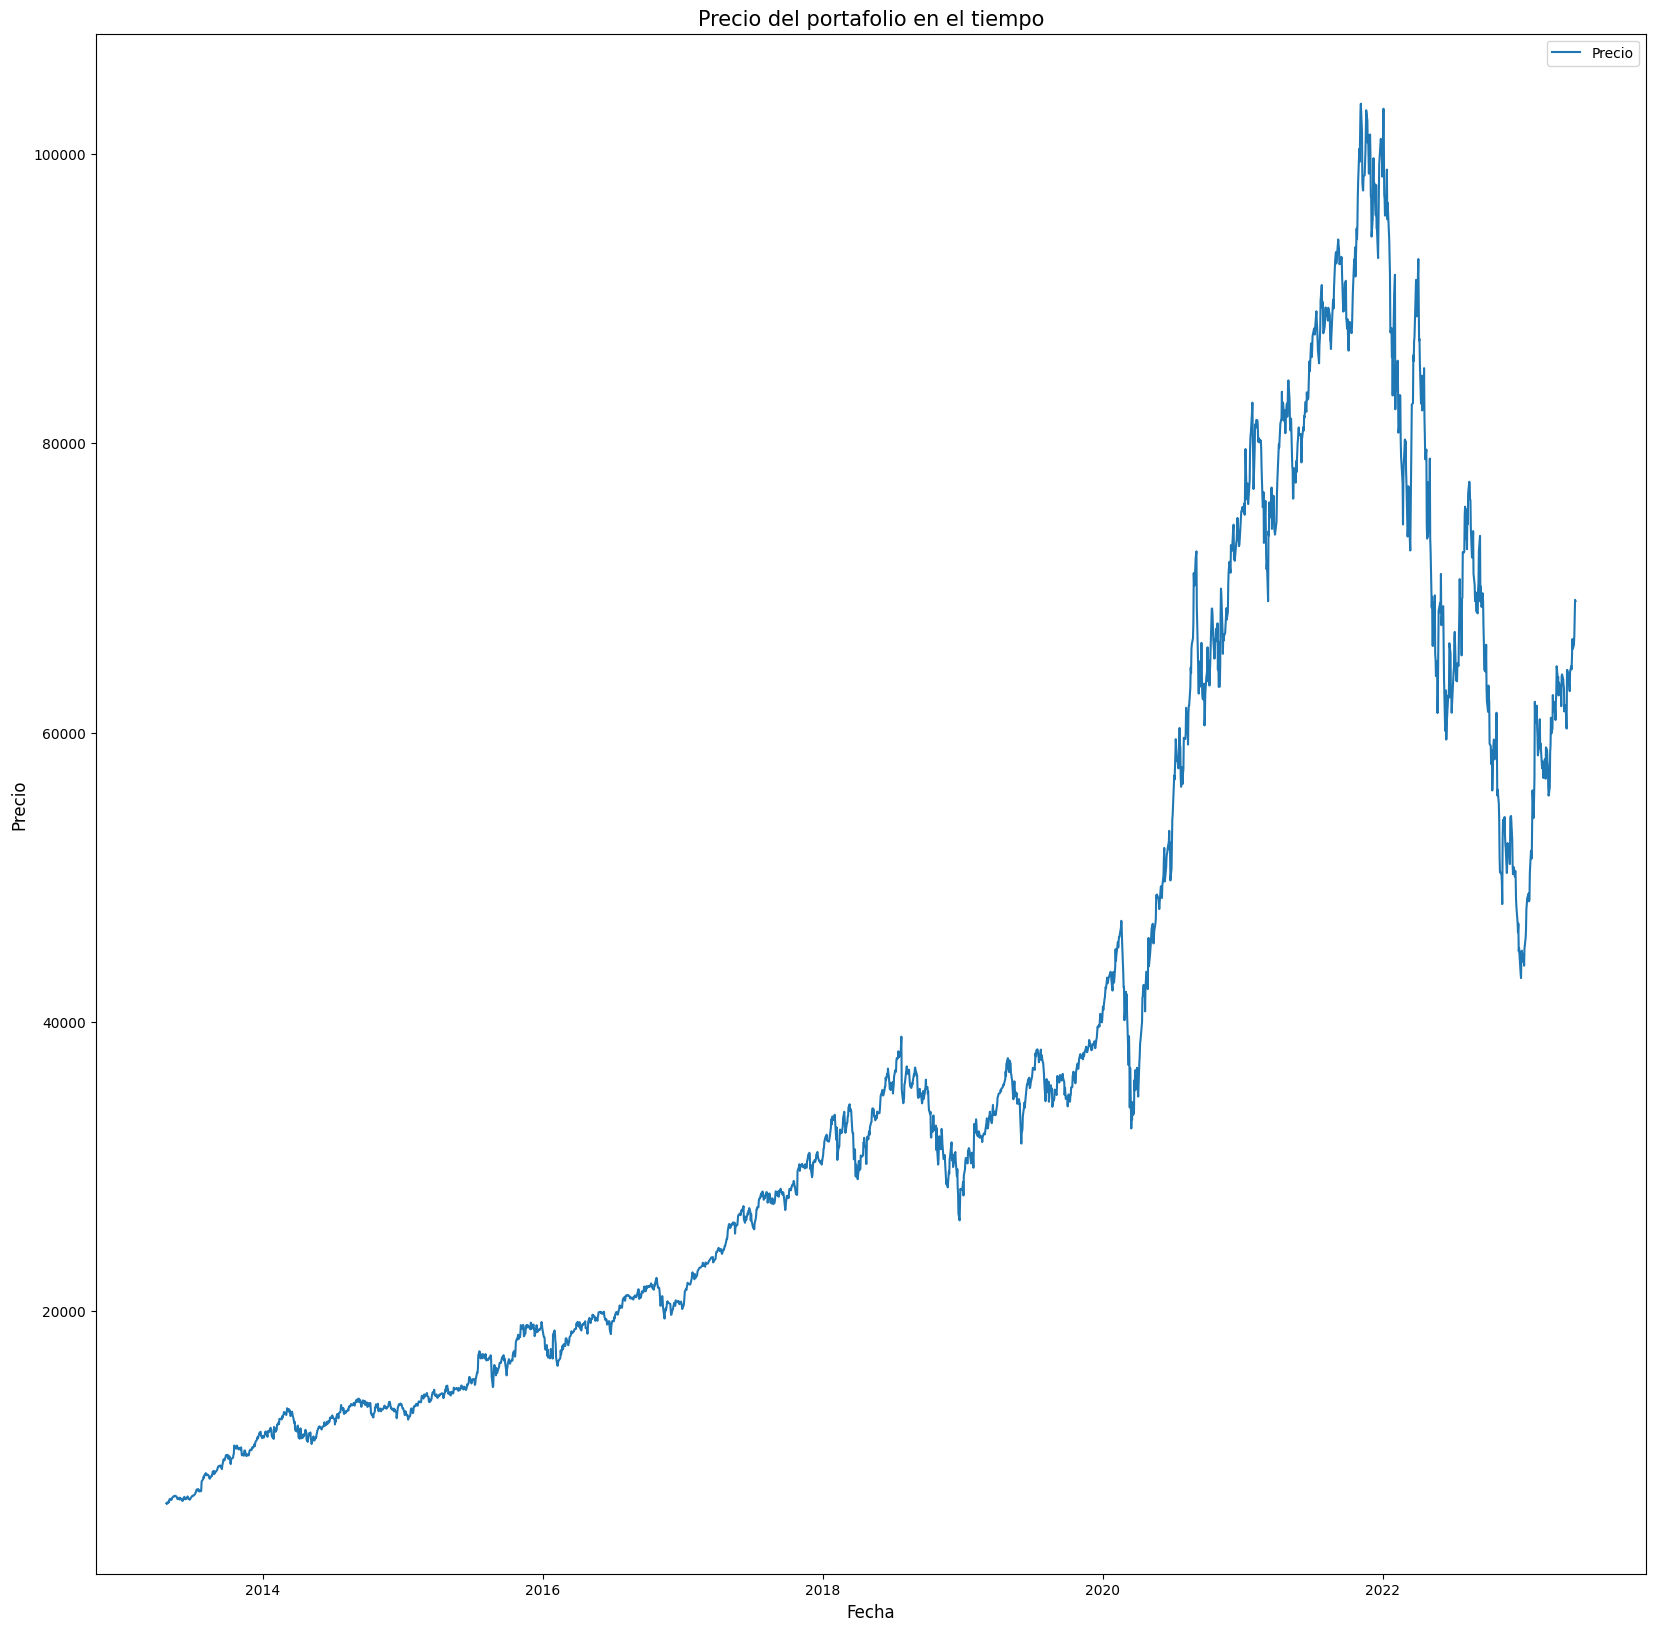

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(df_portafolio["Fechas"],df_portafolio["Total"],label="Precio")
plt.title('Precio del portafolio en el tiempo',fontsize=15)
plt.xlabel('Fecha',fontsize=12)
plt.ylabel('Precio',fontsize=12)
plt.legend()
plt.show()

Media y desviacion estandar de los rendimientos del portafolio.

In [ ]:
media_portafolio = df_portafolio["Rend_portafolio"].mean()
desviacion_portafolio = df_portafolio["Rend_portafolio"].std()

print(f"media_portafolio: {media_portafolio}\ndesviacion_portafolio: {desviacion_portafolio}")
print(" ")

media_portafolio: 0.0009196640242717836
desviacion_portafolio: 0.018086799010922677
 


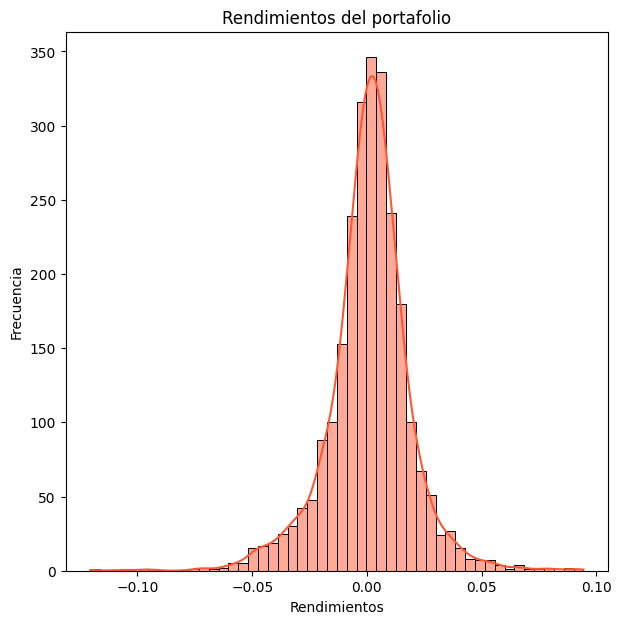

In [ ]:
histograma_(df_portafolio,
            var="Rend_portafolio",
            color="#FF5733",
            title="Rendimientos del portafolio",
            x_axis="Rendimientos",
            y_axis="Frecuencia",
            size=(7,7))

Para calcular el VaR Monte Carlo, necesitamos estimar el precio de acción para mañana con la fórmula del Movimiento Browniano Geométrico considerando t=1:

$$\hat S_1 = S_0 e^{\left(\hat \mu-\frac{\hat {\sigma^2}}{2}\right) + \hat\sigma W_t} $$

Donde $W_t = Z$ un número aleatoria de una Normal Estándar.

Dado que es un portafolio con 5 activos, nececitaremos un vector de 5 entradas en donde se supone que cada accion tiene correlacion entre las acciones.
Tenemos que :

$\bar{S_1} =(s_1^1,s_1^2,s_1^3,s_1^4,s_1^5)$ donde t=1 indicando el pecio a un dia de la accion y los supraindices indican la accion, en este caso tenemos a 5 acciones.
Asi entonces:

$\bar{S_1}^* = \bar{S_0} exp\{(\bar{\mu}- \frac{\sum}{2}) + \sqrt{\sum}\bar{Z}\}$

Donde:

$\bar{S_0}$ : Vector de ultimos precios de la accion.

$\bar{\mu}$ : vector de medias de los activos.

$\sum$ : Vector de varianza de los rendimientos.

$\sqrt{\sum}$ : "Raiz" de la matriz de varianzas y covarianzas. (Aqui se usa cholesky)

$\bar{Z}$ : Simulaciones de una normal multivariada estandar.

In [ ]:
df_simulaciones = pd.DataFrame()

#Rendimientos logaritmivos de los activos (columnas)
activos = np.array([df_percios["Rend_AAPL"],
                    df_percios["Rend_GOOG"],
                    df_percios["Rend_AMZN"],
                    df_percios["Rend_META"],
                    df_percios["Rend_TSLA"]]).T
#Matriz de varianzas y covarianzas entre los rendimientos de los activos
mat_cov = np.cov(activos, rowvar=False)
#Matriz de cholezky, o raiz de la matriz de covarianzas
L = np.linalg.cholesky(mat_cov)
#Rendimientos promedio
mu_vec = np.array([media_AAPL, media_GOOG, media_AMZN, media_META,media_TSLA])
#Matriz de varianzas para generar la normal multivareada
mat_var = np.array([desviacion_AAPL**2, desviacion_GOOG**2, desviacion_AMZN**2, desviacion_META**2,desviacion_TSLA**2])
# numero de activos
n = len(activos[0])
# media y covarianza
mean = np.zeros(n)
cov = np.eye(n)  # Esto crea una matriz de identidad de dimensión n
#Normal multivareada
norm_mul = np.random.multivariate_normal(mean, cov, 1000000)
#Vector de precios de s0
s0 = np.array([df_portafolio.iloc[-1, 1], df_portafolio.iloc[-1, 2], df_portafolio.iloc[-1, 3], df_portafolio.iloc[-1, 4],df_portafolio.iloc[-1,5]])

# Crear un DataFrame vacío para las simulaciones
df_simulaciones = pd.DataFrame()

# Cálculo ajustado para df_simulaciones['Sim_S1']
exp_arg = (mu_vec - (mat_var / 2)) + np.matmul(norm_mul, L.T)
df_simulaciones['Sim_S1'] = np.sum(s0 * np.exp(exp_arg), axis=1)
df_simulaciones.reset_index(drop=False,inplace=True)
df_simulaciones['index'] = df_simulaciones['index'] + 1
df_simulaciones = df_simulaciones.rename({"index": "Dia"}, axis=1)

df_simulaciones

,Dia,Sim_S1
0,1,66613.079788
1,2,71538.558009
2,3,70012.839910
3,4,70163.962544
4,5,68362.818431
...,...,...
999995,999996,68645.385672
999996,999997,71900.285521
999997,999998,71075.750814
999998,999999,69245.698510


Matriz de varianzas y covarianzas entre las acciones.

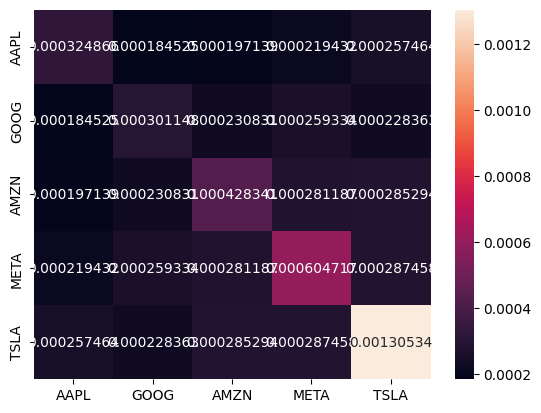

In [ ]:
labs = ["AAPL","GOOG","AMZN","META","TSLA"]
sns.heatmap(mat_cov,annot=True,fmt="g",xticklabels=labs,yticklabels=labs)
plt.show()

Calculo de los log-rendimientos de los precios simulados.

In [ ]:
df_simulaciones['Rendimientos'] = np.log(df_simulaciones["Sim_S1"]/df_simulaciones["Sim_S1"].shift(1))
df_simulaciones.dropna(inplace=True)
df_simulaciones.reset_index(drop=True,inplace=True)
df_simulaciones['Rendimientos'] 

0         0.071336
1        -0.021558
2         0.002156
3        -0.026006
4         0.045543
            ...   
999994   -0.007731
999995    0.046326
999996   -0.011534
999997   -0.026085
999998    0.011222
Name: Rendimientos, Length: 999999, dtype: float64

Calculo del precentil 95  para estimar la maxima perdida problable de rendimiento.

In [ ]:
VaR_95_montecarlo_portafolio = np.percentile(df_simulaciones['Rendimientos'],5)
VaR_95_montecarlo_portafolio

-0.042559278791335343

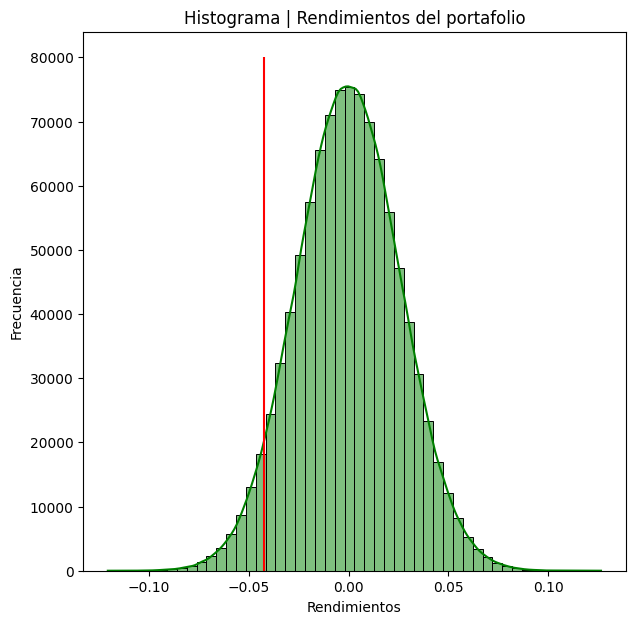

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(data = df_simulaciones['Rendimientos'], kde = True, color = "green", bins = 50).vlines(x =VaR_95_montecarlo_portafolio,
                                                                                             ymin = 0,ymax=80000,color ='red')
plt.title("Histograma | Rendimientos del portafolio")
plt.xlabel("Rendimientos")
plt.ylabel("Frecuencia")
plt.show()

Si se invierten 1,000,000 de dolares en el portafolio la maxima perdida probable mediante el meto VaR montecarlo es el producto del percentil 95 por la cantidad a invertir, en este caso 1,000,000 de dolares.

In [ ]:
VaR_95_montecarlo_portafolio *1000000

-42559.278791335346